## What are the minimum steps to map a shapefile?
This program maps a shapefile using folium. The steps that follow should be the minimum steps to see the shapefile in the notebook file.

## Description of Program
- program:    URSC645_StepstoMapShapefile
- task:       Map a shapfile
- Version:    2025-01-09 - update for Spring 2025
- project:    Urban Analytics URSC 645
- funding:	  Texas A&M University Department of Landscape Architecture and Urban Planning
- author:     Nathanael Rosenheim \ 2020, 2025

## Step 0: Good Housekeeping
1. Import all packages at the top of the notebook
2. Check the versions of the packages used in the notebook
3. Check the working directory

In [1]:
# 1. Import all packages
import os   # For saving output to path
import sys  # For checking version of python for replication
import pandas as pd
import numpy as np
import geopandas as gpd
import folium as fm # folium has more dynamic maps - but requires internet connection

In [2]:
# 2. Check versions
# Display versions being used - important information for replication
print("Python Version     ", sys.version)
print("pandas version:    ", pd.__version__)
print("numpy version:     ", np.__version__)
print("geopandas version: ", gpd.__version__)
print("folium version:    ", fm.__version__)

Python Version      3.12.8 | packaged by conda-forge | (main, Dec  5 2024, 14:06:27) [MSC v.1942 64 bit (AMD64)]
pandas version:     2.2.3
numpy version:      2.2.1
geopandas version:  1.0.1
folium version:     0.19.4


In [3]:
# 3. Check working directory
# Get information on current working directory (getcwd)
os.getcwd()

'c:\\Users\\nathanael99\\MyProjects\\GitHub\\URSC645\\Posted\\CodingExercises'

# Step 1: Obtain Data

In [4]:
# census website with all avaiable TIGER shapefiles - very good website to know
census_geo_https = 'https://www2.census.gov/geo/tiger/'
# URL for a 2010 county
#tl_2010_bg_shp = census_geo_https + 'TIGER2010/BG/2010/tl_2010_48041_bg10.zip'
# URL for a 2020 state (not available for one county)
tl_2020_bg_shp = census_geo_https + 'TIGER2020/BG/tl_2020_48_bg.zip'
# read in zip file directly from website - geopandas will read in the shp from the zip folder
tl_bg_gdf = gpd.read_file(tl_2020_bg_shp)

In [5]:
tl_bg_gdf.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,48,153,950600,3,481539506003,Block Group 3,G5030,S,9238641,0,+33.9697231,-101.3632430,"POLYGON ((-101.37703 33.98424, -101.37701 33.9..."
1,48,153,950600,5,481539506005,Block Group 5,G5030,S,1070676551,101332,+33.9417578,-101.2985920,"POLYGON ((-101.56453 34.05969, -101.56393 34.0..."
2,48,161,000400,1,481610004001,Block Group 1,G5030,S,12766486,8204,+31.7876907,-096.4702707,"POLYGON ((-96.49643 31.79633, -96.49558 31.796..."
3,48,161,000600,1,481610006001,Block Group 1,G5030,S,153883256,544987,+31.5680364,-096.3135009,"POLYGON ((-96.42136 31.68625, -96.42085 31.686..."
4,48,175,960200,1,481759602001,Block Group 1,G5030,S,391287006,1789495,+28.7110687,-097.4683451,"POLYGON ((-97.65396 28.75391, -97.65384 28.754..."


### Quick overview map

<Axes: >

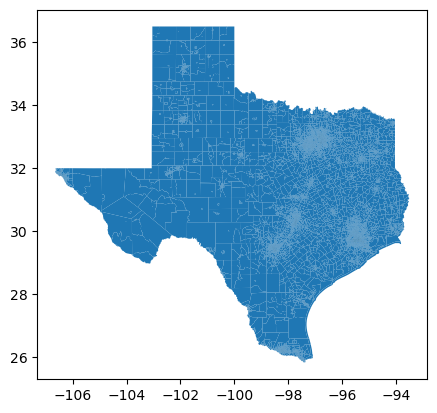

In [6]:
# plot the shapefile
tl_bg_gdf.plot()

# Step 2: Clean Data

## Check the Coordinate Reference System (CRS)

In [7]:
tl_bg_gdf.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

If the CRS is missing then one can manually set the CRS if it is know. For exapmle, data from NGHIS has the CRS 

Esri's USA Contiguous Albers Equal Area Conic projection

Which is equal to ESRI:102003

The above details about the shapefile are based on NGHIS technical documentation and a Google Search for the EPSG format of the projection.

https://www.nhgis.org/support/faq#projected_coordinate_system

https://epsg.io/102003


In [8]:
# Manually set crs
#tl_bg_gdf.crs = {'init': 'ESRI:102003'}

CRS for folium needs to match Google Eartg and Open Street Map. Which is EPSG:4326 - wgs84 in lat lon coordinates.

In [9]:
# update the CRS
tl_bg_gdf = tl_bg_gdf.to_crs(epsg=4326)
tl_bg_gdf.crs

tl_bg_gdf.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,48,153,950600,3,481539506003,Block Group 3,G5030,S,9238641,0,+33.9697231,-101.3632430,"POLYGON ((-101.37703 33.98424, -101.37701 33.9..."
1,48,153,950600,5,481539506005,Block Group 5,G5030,S,1070676551,101332,+33.9417578,-101.2985920,"POLYGON ((-101.56453 34.05969, -101.56393 34.0..."
2,48,161,000400,1,481610004001,Block Group 1,G5030,S,12766486,8204,+31.7876907,-096.4702707,"POLYGON ((-96.49643 31.79633, -96.49558 31.796..."
3,48,161,000600,1,481610006001,Block Group 1,G5030,S,153883256,544987,+31.5680364,-096.3135009,"POLYGON ((-96.42137 31.68625, -96.42086 31.686..."
4,48,175,960200,1,481759602001,Block Group 1,G5030,S,391287006,1789495,+28.7110687,-097.4683451,"POLYGON ((-97.65397 28.75391, -97.65385 28.754..."


## Select one county to map
The original datafile has all counties, we just want to map one county.

In [10]:
# Create a new variable to flag observations in county
countyselect = ["041"]
tl_bg_gdf['CountySelect'] = np.where(tl_bg_gdf['COUNTYFP'].isin(countyselect),1,0)
pd.crosstab(index=tl_bg_gdf['CountySelect'], columns="count")

col_0,count
CountySelect,
0,18486
1,152


In [11]:
tl_bg_gdf_countyselect = tl_bg_gdf[tl_bg_gdf['CountySelect'] == 1]
tl_bg_gdf_countyselect.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,CountySelect
7389,48,041,000603,1,480410006031,Block Group 1,G5030,S,821655,0,+30.6718526,-096.3736890,"POLYGON ((-96.38077 30.67169, -96.38067 30.672...",1
7390,48,041,000603,2,480410006032,Block Group 2,G5030,S,625869,0,+30.6736060,-096.3869158,"POLYGON ((-96.39326 30.67525, -96.39318 30.675...",1
7391,48,041,000603,3,480410006033,Block Group 3,G5030,S,1074838,0,+30.6679114,-096.3819122,"POLYGON ((-96.39113 30.66936, -96.39072 30.669...",1
7417,48,041,000700,1,480410007001,Block Group 1,G5030,S,371066,0,+30.6743890,-096.3617172,"POLYGON ((-96.36971 30.67614, -96.36863 30.676...",1
7418,48,041,000700,3,480410007003,Block Group 3,G5030,S,346856,0,+30.6689744,-096.3610246,"POLYGON ((-96.36565 30.66758, -96.36508 30.668...",1


# Step 3: Explore Data

### Map the data
The follium package allows for interactive maps to be generated. The commands below illustrate how two layers can be mapped in one interactive html file. The html file is saved and can be open in a webbrowser.

Follium provides the tools to make interactive webmaps. Helpful guidance has been found at:
- https://python-visualization.github.io/folium/modules.html
- https://python-visualization.github.io/folium/quickstart.html
- https://ocefpaf.github.io/python4oceanographers/blog/2015/12/14/geopandas_folium/

In [12]:
# What location should the map be centered on?
center_x = tl_bg_gdf_countyselect.bounds.minx.mean()
center_y = tl_bg_gdf_countyselect.bounds.miny.mean()
center_x, center_y

(np.float64(-96.34858609138762), np.float64(30.618618264261475))

In [13]:
# set intial map = use CRS 3857
map = fm.Map(location=[center_y,center_x], zoom_start=10)
# add county data to map
fm.GeoJson(tl_bg_gdf_countyselect).add_to(map)
map

In [14]:
# Code to save map as an html file
# map_save_file = 'map.html'
# map.save(map_save_file)